In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from HAT import Hypergraph
from HAT import draw
from HAT.HAT import multicorrelations
import numpy as np



In [2]:
import pandas as pd
path = "mouse_neurons.csv"
df = pd.read_csv(path)
df.columns = [i for i in range(df.shape[1])]
df = df.drop([0], axis=1).drop([0], axis=0)
df = df.apply(pd.to_numeric, errors='coerce')

In [3]:
#(a)-(c)
edge_list = []
for mtype in ['Drezner', 'Wang', 'Taylor']: 
    for order in range(3, 6):
        strength, group = multicorrelations(df.values, order=order, mtype=mtype)
        thresh = np.percentile(strength, 99.9) #I make the threshold by percentile since some hypergraphs were empty with a fixed threshold
        idxs = np.where(strength > thresh)[0]
        edge_list.append(group[idxs])

array([[ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  5],
       [ 0,  1,  2,  3,  6],
       ...,
       [14, 15, 17, 18, 19],
       [14, 16, 17, 18, 19],
       [15, 16, 17, 18, 19]], shape=(15504, 5))

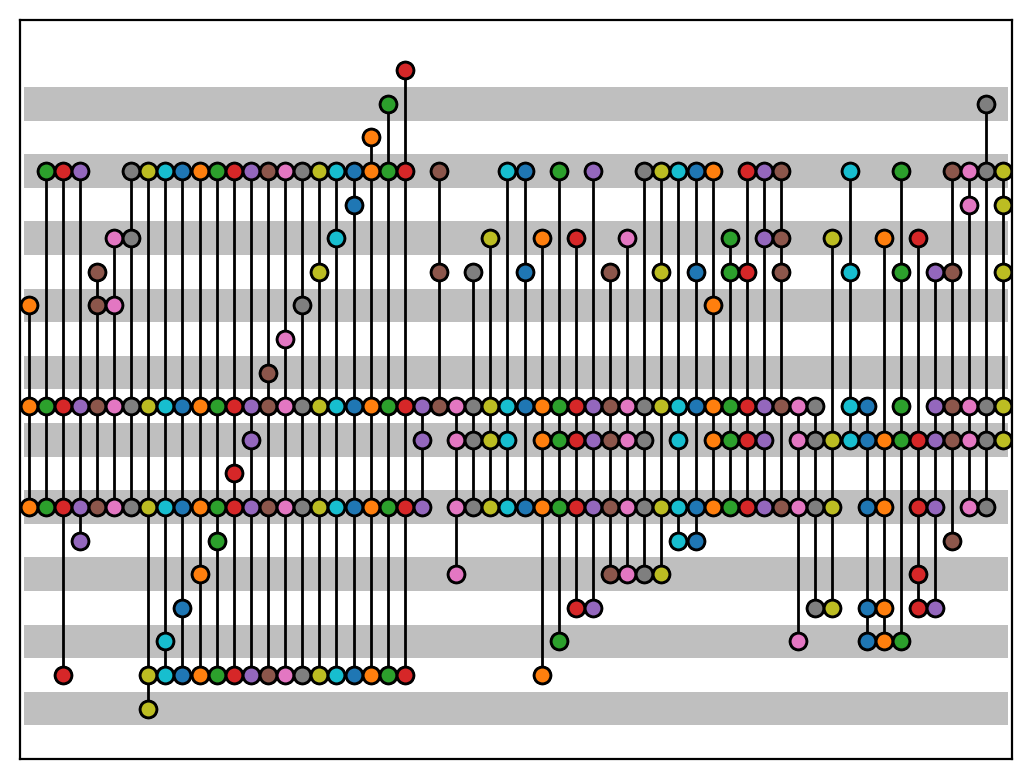

In [4]:
all_edges = [edge for sublist in edge_list for edge in sublist]  # Make a non_uniform hypergraph by combining all of the above edges

HG = Hypergraph(all_edges)
draw.incidence_plot(HG)

group

In [18]:
edge_list = []
nodecount = 0
max_k = 5
percentile = 99.99

# Add artificial nodes while maintaining distinct nodes per edge
for mtype in ['Drezner', 'Wang', 'Taylor']: 
    for order in range(3, max_k + 1):
        strength, group = multicorrelations(df.values, order=order, mtype=mtype)
        thresh = np.percentile(strength, percentile)
        idxs = np.where(strength > thresh)[0]
        
        for idx in idxs:
            adjusted_group = list(group[idx])
            if len(adjusted_group) < max_k:                
                # Add distinct artificial nodes until the group has max_k nodes
                while len(adjusted_group) < max_k:
                    artificial_node_name = f"A{nodecount}"
                    adjusted_group.append(artificial_node_name)  # Append this unique artificial node
                    nodecount += 1
            
            edge_list.append(adjusted_group)  # Add the distinct adjusted group to the edge list

# Check the resulting edge list as a DataFrame
pd.DataFrame(edge_list).head(20)


KeyboardInterrupt: 

y_positions=[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]


<Axes: >

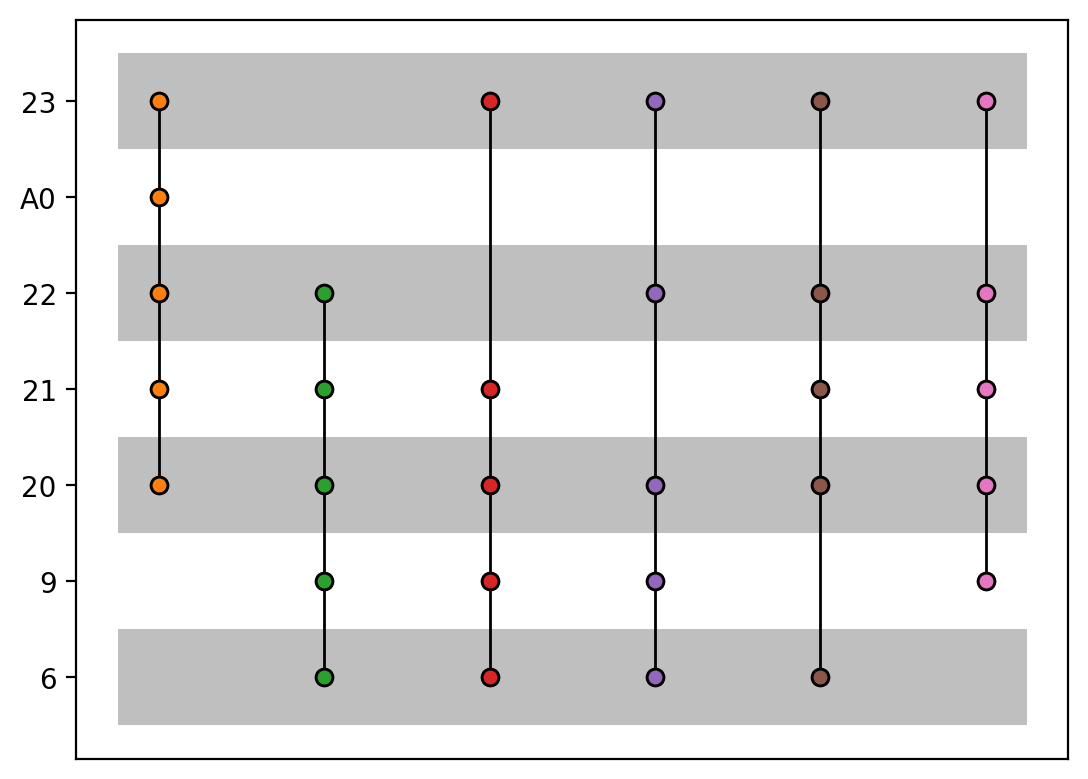

In [15]:

HG = Hypergraph(edge_list)
draw.incidence_plot(HG, node_labels = 'Names')

In [7]:
pd.DataFrame(edge_list)

,0,1,2,3,4
0,6,9,16,A0,A0
1,6,9,16,20,A2
2,9,20,21,A3,A3
3,9,20,21,22,A5
4,6,9,20,21,22
5,6,9,20,21,23
6,6,20,21,22,23
7,9,20,21,22,23
